<a href="https://colab.research.google.com/github/jhwnoh/UST2024Fall_MaterialsInformatics/blob/main/AE_VAE_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
from torchvision.utils import save_image

In [27]:
TorchModule = {'linear':nn.Linear,
               'conv1d':nn.Conv1d,
               'conv2d':nn.Conv2d,
               'conv3d':nn.Conv3d,
               'convtrans1d':nn.ConvTranspose1d,
               'convtrans2d':nn.ConvTranspose2d,
               'convtrans3d':nn.ConvTranspose3d,
               'maxpool1d':nn.MaxPool1d,
               'maxpool2d':nn.MaxPool2d,
               'maxpool3d':nn.MaxPool3d,
               'sigmoid':nn.Sigmoid(),
               'tanh':nn.Tanh(),
               'relu':nn.ReLU(),
               'lrelu':nn.LeakyReLU(),
               'bn1d':nn.BatchNorm1d,
               'bn2d':nn.BatchNorm2d,
               'bn3d':nn.BatchNorm3d,
               'dropout':nn.Dropout}

def LayerGroup(mylayers):
    mylayer_list = mylayers.split('|')

    module_list = []
    for mylayer in mylayer_list:
        if '-' in mylayer:
            tmp = mylayer.split('-')

            name = tmp[0]

            if name == 'linear':
                dims = [int(v) for v in tmp[1].split(',')]
                sub_model = TorchModule[name](*dims)
            elif 'conv' in name:
                dims = [int(v) for v in tmp[1].split(',')]
                sub_model = TorchModule[name](*dims)
            elif 'pool' in name:
                dims = [int(v) for v in tmp[1].split(',')]
                sub_model = TorchModule[name](*dims)
            elif 'bn' in name:
                dims = [int(v) for v in tmp[1].split(',')]
                sub_model = TorchModule[name](*dims)
            elif name == 'dropout':
                dims = [float(v) for v in tmp[1].split(',')]
                sub_model = TorchModule[name](*dims)

            module_list.append(sub_model)

        else:
            module_list.append(TorchModule[mylayer])

    module_list = nn.ModuleList(module_list)
    return nn.Sequential(*module_list)

In [28]:
mylayers = 'linear-100,50|tanh|linear-50,10|bn1d-10|relu|linear-10,1'
my_model = LayerGroup(mylayers).cuda()
my_model

Sequential(
  (0): Linear(in_features=100, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=10, bias=True)
  (3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): ReLU()
  (5): Linear(in_features=10, out_features=1, bias=True)
)

In [7]:
x = torch.randn(10,100).cuda()
#y = my_model(x)
print(x.shape)

TypeError: randn() received an invalid combination of arguments - got (float, int), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.Generator generator, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self,enc_info,dec_info):
        super(Autoencoder,self).__init__()

        self.encoder = LayerGroup(enc_info)
        self.decoder = LayerGroup(dec_info)

    def forward(self,x):
        z = self.encoder(x)
        out = self.decoder(z)
        return z,out

enc_info = 'linear-784,512|relu|linear-512,20'
dec_info = 'linear-20,512|relu|linear-512,784|sigmoid'

my_autoencoder = Autoencoder(enc_info,dec_info).cuda()

print(my_autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=20, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [3]:
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="./",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root="./",
    train=False,
    download=True,
    transform=ToTensor(),
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size,shuffle=True)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
from tqdm import tqdm

optimizer = torch.optim.Adam(my_autoencoder.parameters(), lr=0.001)

num_epoch = 10

Loss = []
for epoch in range(num_epoch):
    print('============= Epoch: '+str(epoch+1)+' =============')
    my_autoencoder.train()

    L1 = 0
    N1 = 0
    for x,y in tqdm(train_dataloader):
        x = x.cuda().view(-1,28*28)

        z,x_pred = my_autoencoder(x)

        loss = torch.mean((x_pred-x)**2)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        L1 += len(x)*loss.detach().cpu().numpy()
        N1 += len(x)

    my_autoencoder.eval()
    Zs = []
    Xs = []
    Ys = []

    L2 = 0
    N2 = 0
    for x,y in tqdm(test_dataloader):
        x = x.cuda().view(-1,28*28)

        z,x_pred = my_autoencoder(x)

        loss = torch.mean((x_pred-x)**2)

        L2 += len(x)*loss.detach().cpu().numpy()
        N2 += len(x)

        Zs.append(z.detach().cpu().numpy())
        Xs.append(x_pred.detach().cpu().numpy())
        Ys.append(y.detach().cpu().numpy())

    Loss.append([L1/N1,L2/N2])
    print(Loss[-1])

Loss = np.array(Loss)
Zs = np.vstack(Zs)
Xs = np.vstack(Xs)
Ys = np.hstack(Ys)

============= Epoch: 1 =============


100%|██████████| 157/157 [00:01<00:00, 137.24it/s]


[0.02458011348048846, 0.012617839121818542]
============= Epoch: 2 =============


100%|██████████| 157/157 [00:01<00:00, 135.10it/s]


[0.011720407678186894, 0.010474132476747037]
============= Epoch: 3 =============


100%|██████████| 157/157 [00:01<00:00, 103.89it/s]


[0.010149962118764719, 0.009463770231604576]
============= Epoch: 4 =============


100%|██████████| 157/157 [00:01<00:00, 129.03it/s]


[0.009315771088500818, 0.008927177393436432]
============= Epoch: 5 =============


100%|██████████| 157/157 [00:01<00:00, 135.54it/s]


[0.008774724068741004, 0.008576623919606209]
============= Epoch: 6 =============


100%|██████████| 157/157 [00:01<00:00, 134.37it/s]


[0.008371609835326671, 0.008229368499666453]
============= Epoch: 7 =============


100%|██████████| 157/157 [00:01<00:00, 138.34it/s]


[0.008066947381695111, 0.00803663758188486]
============= Epoch: 8 =============


100%|██████████| 157/157 [00:01<00:00, 136.49it/s]


[0.007813222043216229, 0.007834801878035069]
============= Epoch: 9 =============


100%|██████████| 157/157 [00:01<00:00, 113.80it/s]


[0.007619811114172141, 0.0077305853962898255]
============= Epoch: 10 =============


100%|██████████| 157/157 [00:01<00:00, 136.32it/s]

[0.007439723677933216, 0.007582337285578251]


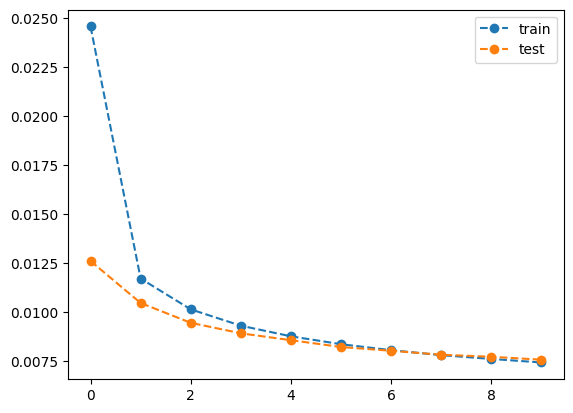

In [ ]:
import matplotlib.pyplot as plt

Loss = np.array(Loss)
plt.plot(Loss[:,0],'o--',label='train')
plt.plot(Loss[:,1],'o--',label='test')
plt.legend()

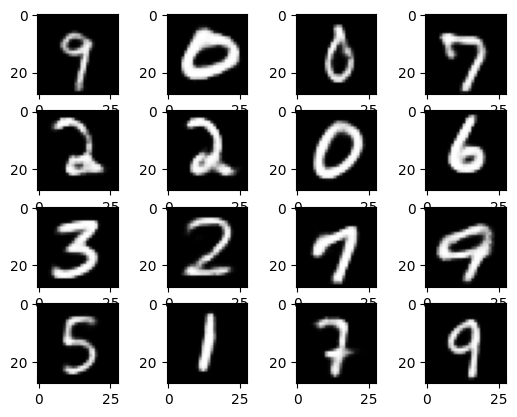

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(Xs[i].reshape(28,28),cmap='gray')

In [ ]:
class ConvAE(nn.Module):
    def __init__(self,enc_info,dec_info):
        super(ConvAE,self).__init__()

        self.encoder = LayerGroup(enc_info)
        self.decoder = LayerGroup(dec_info)

    def forward(self,x):
        z = self.encoder(x)
        out = self.decoder(z)
        return z,out

enc_info = 'conv2d-1,16,3,1,1|relu|maxpool2d-2,2,0|conv2d-16,32,3,1,1|relu|maxpool2d-2,2,0|conv2d-32,32,7,7,0'
dec_info = 'convtrans2d-32,32,7,7,0|relu|convtrans2d-32,32,6,2,2|relu|convtrans2d-32,1,6,2,2|sigmoid'

my_conv_autoencoder = ConvAE(enc_info,dec_info).cuda()
print(my_conv_autoencoder)

x = torch.randn(10,1,28,28).cuda()
z,x_pred = my_conv_autoencoder(x)
print(x.shape)
print(z.shape)
print(x_pred.shape)

ConvAE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(7, 7), stride=(7, 7))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 32, kernel_size=(7, 7), stride=(7, 7))
    (1): ReLU()
    (2): ConvTranspose2d(32, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(32, 1, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (5): Sigmoid()
  )
)
torch.Size([10, 1, 28, 28])
torch.Size([10, 32, 1, 1])
torch.Size([10, 1, 28, 28])


In [ ]:
from tqdm import tqdm

optimizer = torch.optim.Adam(my_conv_autoencoder.parameters(), lr=0.001)

num_epoch = 10

Loss = []
for epoch in range(num_epoch):
    print('============= Epoch: '+str(epoch+1)+' =============')
    my_conv_autoencoder.train()

    L1 = 0
    N1 = 0
    for x,y in tqdm(train_dataloader):
        x = x.cuda()

        z,x_pred = my_conv_autoencoder(x)

        loss = torch.mean((x_pred-x)**2)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        L1 += len(x)*loss.detach().cpu().numpy()
        N1 += len(x)

    my_conv_autoencoder.eval()
    Zs = []
    Xs = []
    Ys = []

    L2 = 0
    N2 = 0
    for x,y in tqdm(test_dataloader):
        x = x.cuda()

        z,x_pred = my_conv_autoencoder(x)

        loss = torch.mean((x_pred-x)**2)

        L2 += len(x)*loss.detach().cpu().numpy()
        N2 += len(x)

        Zs.append(z.detach().cpu().numpy().reshape(-1,32))
        Xs.append(x_pred.detach().cpu().numpy())
        Ys.append(y.detach().cpu().numpy())

    Loss.append([L1/N1,L2/N2])
    print(Loss[-1])

Loss = np.array(Loss)
Zs = np.vstack(Zs)
Xs = np.vstack(Xs)
Ys = np.hstack(Ys)

============= Epoch: 1 =============


100%|██████████| 157/157 [00:01<00:00, 106.94it/s]


[0.007902540832509597, 0.006336035232245922]
============= Epoch: 2 =============


100%|██████████| 157/157 [00:01<00:00, 106.45it/s]


[0.005818734598408142, 0.005230796080827713]
============= Epoch: 3 =============


100%|██████████| 157/157 [00:01<00:00, 103.97it/s]


[0.005095369161168734, 0.00487990455776453]
============= Epoch: 4 =============


100%|██████████| 157/157 [00:01<00:00, 107.21it/s]


[0.004724109391619762, 0.004575991939753294]
============= Epoch: 5 =============


100%|██████████| 157/157 [00:01<00:00, 106.53it/s]


[0.004493026885638634, 0.004489614086598158]
============= Epoch: 6 =============


100%|██████████| 157/157 [00:01<00:00, 108.40it/s]


[0.004324138016750415, 0.004233820550143719]
============= Epoch: 7 =============


100%|██████████| 157/157 [00:01<00:00, 105.82it/s]


[0.004197678080076973, 0.004197940833866596]
============= Epoch: 8 =============


100%|██████████| 157/157 [00:01<00:00, 104.58it/s]


[0.004099480171501637, 0.004109628103673458]
============= Epoch: 9 =============


100%|██████████| 157/157 [00:01<00:00, 105.48it/s]


[0.004014996639639139, 0.003977423540130257]
============= Epoch: 10 =============


100%|██████████| 157/157 [00:01<00:00, 107.63it/s]

[0.003950905083616575, 0.004006468565762043]


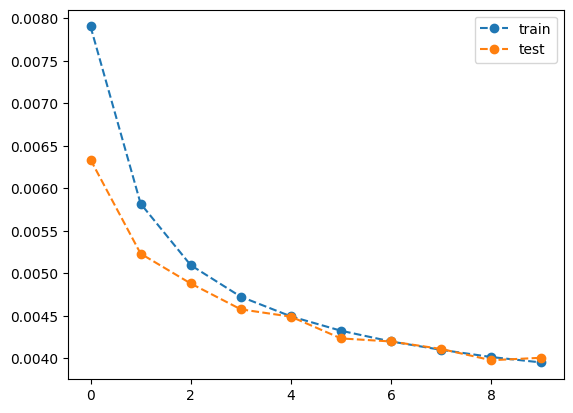

In [ ]:
import matplotlib.pyplot as plt

Loss = np.array(Loss)
plt.plot(Loss[:,0],'o--',label='train')
plt.plot(Loss[:,1],'o--',label='test')
plt.legend()

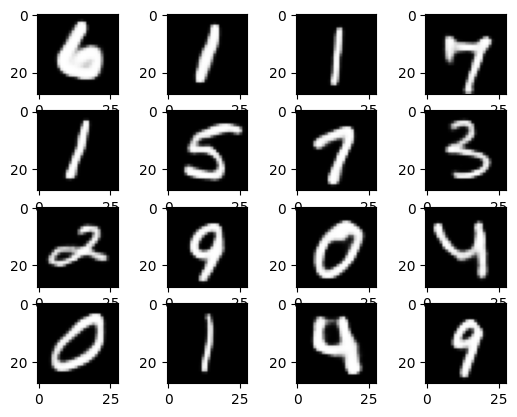

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(Xs[i].reshape(28,28),cmap='gray')

In [ ]:
class ConvVAE(nn.Module):
    def __init__(self,enc_info,dec_info):
        super(ConvVAE,self).__init__()

        self.encoder = LayerGroup(enc_info)
        self.decoder = LayerGroup(dec_info)

    def forward(self,x):
        h = self.encoder(x)

        mu = h[:,:32]
        logvar = h[:,32:]

        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        z = mu + eps*std

        out = self.decoder(z)
        return z,out,mu,logvar

enc_info = 'conv2d-1,16,3,1,1|relu|maxpool2d-2,2,0|conv2d-16,32,3,1,1|relu|maxpool2d-2,2,0|conv2d-32,64,7,7,0'
dec_info = 'convtrans2d-32,32,7,7,0|relu|convtrans2d-32,32,6,2,2|relu|convtrans2d-32,1,6,2,2|sigmoid'

my_conv_vae = ConvVAE(enc_info,dec_info).cuda()
print(my_conv_vae)

x = torch.randn(10,1,28,28).cuda()
z,x_pred,_,_ = my_conv_vae(x)
print(x.shape)
print(z.shape)
print(x_pred.shape)

ConvVAE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(7, 7), stride=(7, 7))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 32, kernel_size=(7, 7), stride=(7, 7))
    (1): ReLU()
    (2): ConvTranspose2d(32, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(32, 1, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (5): Sigmoid()
  )
)
torch.Size([10, 1, 28, 28])
torch.Size([10, 32, 1, 1])
torch.Size([10, 1, 28, 28])


In [ ]:
from tqdm import tqdm

optimizer = torch.optim.Adam(my_conv_vae.parameters(), lr=0.0003)

num_epoch = 10

Loss = []
for epoch in range(num_epoch):
    print('============= Epoch: '+str(epoch+1)+' =============')
    my_conv_vae.train()

    L1 = 0
    N1 = 0
    for x,y in tqdm(train_dataloader):
        x = x.cuda()

        z,x_pred,mu,logvar = my_conv_vae(x)

        rec = torch.mean((x_pred-x)**2)
        kld = torch.mean(-0.5*(1 + logvar - mu ** 2 - logvar.exp()))

        loss = rec + 0.02*kld

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        L1 += len(x)*rec.detach().cpu().numpy()
        N1 += len(x)

    my_conv_vae.eval()
    Zs = []
    Xs = []
    Ys = []

    L2 = 0
    N2 = 0
    for x,y in tqdm(test_dataloader):
        x = x.cuda()

        z,x_pred,mu,logvar = my_conv_vae(x)

        rec = torch.mean((x_pred-x)**2)
        kld = torch.mean(-0.5*(1 + logvar - mu ** 2 - logvar.exp()))

        L2 += len(x)*rec.detach().cpu().numpy()
        N2 += len(x)

        Zs.append(z.detach().cpu().numpy().reshape(-1,32))
        Xs.append(x_pred.detach().cpu().numpy())
        Ys.append(y.detach().cpu().numpy())

    Loss.append([L1/N1,L2/N2])
    print(Loss[-1])

Loss = np.array(Loss)
Zs = np.vstack(Zs)
Xs = np.vstack(Xs)
Ys = np.hstack(Ys)

============= Epoch: 1 =============


100%|██████████| 157/157 [00:01<00:00, 104.75it/s]


[0.013199892560144266, 0.013585144811868668]
============= Epoch: 2 =============


100%|██████████| 157/157 [00:01<00:00, 101.69it/s]


[0.013419440614183743, 0.013565485155582428]
============= Epoch: 3 =============


100%|██████████| 157/157 [00:01<00:00, 103.93it/s]


[0.013513771834969521, 0.013513912902772427]
============= Epoch: 4 =============


100%|██████████| 157/157 [00:01<00:00, 103.61it/s]


[0.013534761295715968, 0.013668827757239342]
============= Epoch: 5 =============


100%|██████████| 157/157 [00:01<00:00, 100.89it/s]


[0.013596930909653505, 0.013542025075852872]
============= Epoch: 6 =============


100%|██████████| 157/157 [00:01<00:00, 95.67it/s]


[0.013608049348493417, 0.013704830086231232]
============= Epoch: 7 =============


100%|██████████| 157/157 [00:02<00:00, 62.53it/s]


[0.013616139272848765, 0.01352719981521368]
============= Epoch: 8 =============


100%|██████████| 157/157 [00:02<00:00, 75.66it/s]


[0.01362456088066101, 0.01366304753869772]
============= Epoch: 9 =============


100%|██████████| 157/157 [00:01<00:00, 90.47it/s]


[0.013625390091538429, 0.013471098227798938]
============= Epoch: 10 =============


100%|██████████| 157/157 [00:01<00:00, 100.81it/s]

[0.013622687511642775, 0.01352797267884016]


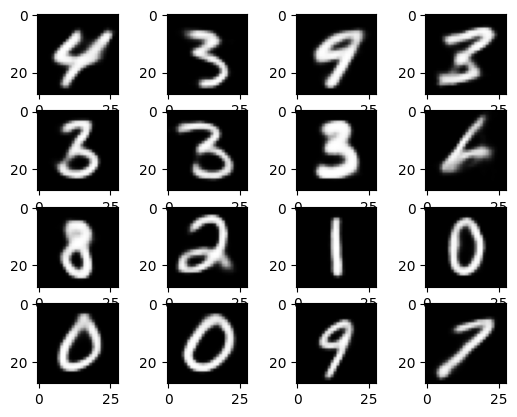

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(Xs[i].reshape(28,28),cmap='gray')

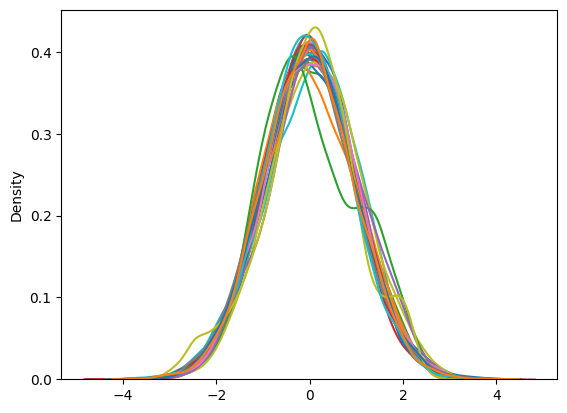

In [ ]:
import seaborn as sns

for i in range(32):
    sns.kdeplot(Zs[:,i])

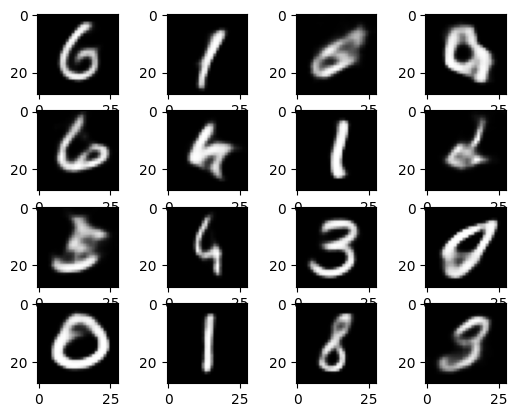

In [ ]:
z = torch.randn(16,32,1,1).cuda()
x_new = my_conv_vae.decoder(z).cpu().detach().numpy()

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_new[i].reshape(28,28),cmap='gray')

In [12]:
class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()

        layer1 = f'linear-{input_size},{hidden_dim*4}|lrelu|dropout-0.3'
        layer2 = f'linear-{hidden_dim*4},{hidden_dim*2}|lrelu|dropout-0.3'
        layer3 = f'linear-{hidden_dim*2},{hidden_dim}|lrelu|dropout-0.3|linear-{hidden_dim},{output_size}'

        self.model = LayerGroup(layer1+'|'+layer2+'|'+layer3)

    def forward(self, x):
        out = self.model(x)
        return out

D = Discriminator(28*28,32,1).cuda()
print(D)

x = torch.randn(10,28*28).cuda()
y = D(x)
print(y.shape)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)
torch.Size([10, 1])


In [13]:
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()

        layer1 = f'linear-{input_size},{hidden_dim}|lrelu|dropout-0.3'
        layer2 = f'linear-{hidden_dim},{hidden_dim*2}|lrelu|dropout-0.3'
        layer3 = f'linear-{hidden_dim*2},{hidden_dim*4}|lrelu|dropout-0.3|linear-{hidden_dim*4},{output_size}|tanh'

        self.model = LayerGroup(layer1+'|'+layer2+'|'+layer3)

    def forward(self, x):
        out = self.model(x)
        return out

G = Generator(100,32,28*28).cuda()
print(G)

x = torch.randn(10,100).cuda()
y = G(x)
print(y.shape)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=128, out_features=784, bias=True)
    (10): Tanh()
  )
)
torch.Size([10, 784])


In [16]:
from tqdm import tqdm

optim_D = torch.optim.Adam(D.parameters(),lr=0.002)
optim_G = torch.optim.Adam(G.parameters(),lr=0.002)

criterion = nn.BCEWithLogitsLoss()

num_epoch = 100
smooth = True

Loss = []
D.train()
G.train()
for epoch in range(num_epoch):
    print('============= Epoch: '+str(epoch+1)+' =============')

    for batch_i,(real_img,_) in enumerate(train_dataloader):

        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================

        batch_size = real_img.shape[0]

        real_img = 2*real_img-1
        real_img = real_img.view(batch_size,-1).cuda()

        optim_D.zero_grad()

        D_real = D(real_img)

        if smooth:
            labels = 0.9*torch.ones(batch_size).cuda()
        else:
            labels = torch.ones(batch_size).cuda()

        loss_real = criterion(D_real.view(-1),labels)

        with torch.no_grad():
            z = np.random.uniform(-1, 1, size=(batch_size, 100))
            z = torch.from_numpy(z).float().cuda()
            fake_img = G(z)

        D_fake = D(fake_img)
        labels = torch.zeros(batch_size).cuda()
        loss_fake = criterion(D_fake.view(-1),labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optim_D.step()

        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================

        optim_G.zero_grad()

        z = np.random.uniform(-1, 1, size=(batch_size, 100))
        z = torch.from_numpy(z).float().cuda()
        fake_img = G(z)

        D_fake = D(fake_img)

        if smooth:
            labels = 0.9*torch.ones(batch_size).cuda()
        else:
            labels = torch.ones(batch_size).cuda()

        loss_G = criterion(D_fake.view(-1),labels)
        loss_G.backward()
        optim_G.step()

        if batch_i % 400 == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epoch, loss_D.item(), loss_G.item()))


============= Epoch: 1 =============
Epoch [    1/  100] | d_loss: 1.3959 | g_loss: 0.7554
Epoch [    1/  100] | d_loss: 0.8409 | g_loss: 4.4686
Epoch [    1/  100] | d_loss: 0.9750 | g_loss: 0.8964
============= Epoch: 2 =============
Epoch [    2/  100] | d_loss: 1.2847 | g_loss: 0.9492
Epoch [    2/  100] | d_loss: 0.8655 | g_loss: 1.9056
Epoch [    2/  100] | d_loss: 0.7384 | g_loss: 1.5837
============= Epoch: 3 =============
Epoch [    3/  100] | d_loss: 1.1596 | g_loss: 0.9858
Epoch [    3/  100] | d_loss: 1.0584 | g_loss: 1.4627
Epoch [    3/  100] | d_loss: 1.0275 | g_loss: 3.2126
============= Epoch: 4 =============
Epoch [    4/  100] | d_loss: 0.8459 | g_loss: 2.0089
Epoch [    4/  100] | d_loss: 1.0438 | g_loss: 0.9693
Epoch [    4/  100] | d_loss: 1.1067 | g_loss: 1.2100
============= Epoch: 5 =============
Epoch [    5/  100] | d_loss: 0.9143 | g_loss: 1.8636
Epoch [    5/  100] | d_loss: 0.8789 | g_loss: 1.5311
Epoch [    5/  100] | d_loss: 1.0011 | g_loss: 1.0021
=====

KeyboardInterrupt: 

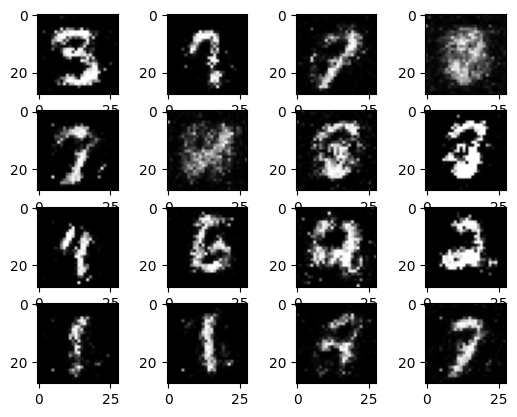

In [18]:
import matplotlib.pyplot as plt

G.eval()

sample_size=16
fixed_z = np.random.uniform(-1, 1, size=(sample_size, 100))
fixed_z = torch.from_numpy(fixed_z).float().cuda()

samples_z = G(fixed_z).cpu().detach().numpy()

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(samples_z[i].reshape(28,28),cmap='gray')

In [20]:
from torchvision.transforms import ToTensor

svhn_train = datasets.SVHN(root='./', split='train', download=True, transform=ToTensor())
svhn_test = datasets.SVHN(root='./', split='test', download=True, transform=ToTensor())

100%|██████████| 182M/182M [00:12<00:00, 15.0MB/s]


100%|██████████| 64.3M/64.3M [00:02<00:00, 23.0MB/s]


In [21]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(svhn_train, batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(svhn_test, batch_size=batch_size,shuffle=True)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


In [29]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        super(Discriminator, self).__init__()

        conv_block1 = f'conv2d-3,{conv_dim},4,2,1|lrelu'
        conv_block2 = f'conv2d-{conv_dim},{conv_dim*2},4,2,1|bn2d-{conv_dim*2}|lrelu'
        conv_block3 = f'conv2d-{conv_dim*2},{conv_dim*4},4,2,1|bn2d-{conv_dim*4}|lrelu'
        fc_block = f'linear-{conv_dim*4*4*4},1'

        self.conv_layer = LayerGroup(conv_block1+'|'+conv_block2+'|'+conv_block3)
        self.fc_layer = LayerGroup(fc_block)

    def forward(self, x):
        B = len(x)

        out = self.conv_layer(x)
        out = out.view(B,-1)
        out = self.fc_layer(out)
        return out

D = Discriminator(32).cuda()
print(D)

x = torch.randn(10,3,32,32).cuda()
y = D(x)
print(y.shape)

Discriminator(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.01)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=2048, out_features=1, bias=True)
  )
)
torch.Size([10, 1])


In [30]:
class Generator(nn.Module):

    def __init__(self, z_size, conv_dim):
        super(Generator, self).__init__()

        self.conv_dim = conv_dim

        fc_block = f'linear-{z_size},{conv_dim*4*4*4}'
        convtrans_block1 = f'convtrans2d-{conv_dim*4},{conv_dim*2},4,2,1|bn2d-{conv_dim*2}|relu'
        convtrans_block2 = f'convtrans2d-{conv_dim*2},{conv_dim},4,2,1|bn2d-{conv_dim}|relu'
        convtrans_block3 = f'convtrans2d-{conv_dim},3,4,2,1|tanh'

        self.fc_layer = LayerGroup(fc_block)
        self.convtrans_layer = LayerGroup(convtrans_block1+'|'+convtrans_block2+'|'+convtrans_block3)

    def forward(self, x):
        B = len(x)
        out = self.fc_layer(x)
        out = out.view(B,self.conv_dim*4,4,4)

        out = self.convtrans_layer(out)
        return out

z_size = 100

G = Generator(z_size,32).cuda()
print(G)

z = torch.randn(10,z_size).cuda()
x_new = G(z)
print(x_new.shape)

Generator(
  (fc_layer): Sequential(
    (0): Linear(in_features=100, out_features=2048, bias=True)
  )
  (convtrans_layer): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Tanh()
  )
)
torch.Size([10, 3, 32, 32])


In [33]:
from tqdm import tqdm

beta1 = 0.5
beta2 = 0.999

optim_D = torch.optim.Adam(D.parameters(),lr=0.0002,betas=[beta1,beta2])
optim_G = torch.optim.Adam(G.parameters(),lr=0.0002,betas=[beta1,beta2])

criterion = nn.BCEWithLogitsLoss()

num_epoch = 100
smooth = True

Loss = []
D.train()
G.train()
for epoch in range(num_epoch):
    print('============= Epoch: '+str(epoch+1)+' =============')

    for batch_i,(real_img,_) in enumerate(train_dataloader):

        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================

        batch_size = real_img.shape[0]

        real_img = 2*real_img-1
        real_img = real_img.cuda()

        optim_D.zero_grad()

        D_real = D(real_img)

        if smooth:
            labels = 0.9*torch.ones(batch_size).cuda()
        else:
            labels = torch.ones(batch_size).cuda()

        loss_real = criterion(D_real.view(-1),labels)

        with torch.no_grad():
            z = np.random.uniform(-1, 1, size=(batch_size, 100))
            z = torch.from_numpy(z).float().cuda()
            fake_img = G(z)

        D_fake = D(fake_img)
        labels = torch.zeros(batch_size).cuda()
        loss_fake = criterion(D_fake.view(-1),labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optim_D.step()

        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================

        optim_G.zero_grad()

        z = np.random.uniform(-1, 1, size=(batch_size, 100))
        z = torch.from_numpy(z).float().cuda()
        fake_img = G(z)

        D_fake = D(fake_img)

        if smooth:
            labels = 0.9*torch.ones(batch_size).cuda()
        else:
            labels = torch.ones(batch_size).cuda()

        loss_G = criterion(D_fake.view(-1),labels)
        loss_G.backward()
        optim_G.step()

        if batch_i % 400 == 0:
            # print discriminator and generator loss
            print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                    epoch+1, num_epoch, loss_D.item(), loss_G.item()))

============= Epoch: 1 =============
Epoch [    1/  100] | d_loss: 0.4829 | g_loss: 5.3344
Epoch [    1/  100] | d_loss: 0.4643 | g_loss: 3.7183
Epoch [    1/  100] | d_loss: 0.4344 | g_loss: 4.1537
============= Epoch: 2 =============
Epoch [    2/  100] | d_loss: 0.5589 | g_loss: 2.1192
Epoch [    2/  100] | d_loss: 0.7199 | g_loss: 2.2301
Epoch [    2/  100] | d_loss: 0.5616 | g_loss: 2.4572
============= Epoch: 3 =============
Epoch [    3/  100] | d_loss: 0.6914 | g_loss: 2.4380
Epoch [    3/  100] | d_loss: 0.5562 | g_loss: 2.0497
Epoch [    3/  100] | d_loss: 0.4979 | g_loss: 2.1616
============= Epoch: 4 =============
Epoch [    4/  100] | d_loss: 0.5950 | g_loss: 2.6581
Epoch [    4/  100] | d_loss: 0.5177 | g_loss: 2.0330
Epoch [    4/  100] | d_loss: 0.4714 | g_loss: 2.6731
============= Epoch: 5 =============
Epoch [    5/  100] | d_loss: 0.6122 | g_loss: 3.3242
Epoch [    5/  100] | d_loss: 0.5092 | g_loss: 3.2232
Epoch [    5/  100] | d_loss: 0.4793 | g_loss: 3.0014
=====

KeyboardInterrupt: 

tensor(1., device='cuda:0')

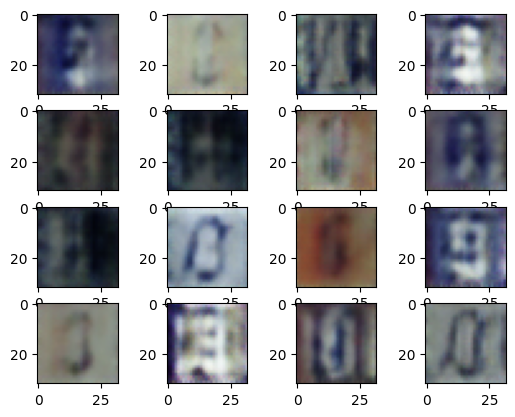

In [38]:
G.eval()

sample_size=16
fixed_z = np.random.uniform(-1, 1, size=(sample_size, 100))
fixed_z = torch.from_numpy(fixed_z).float().cuda()

samples_z = G(fixed_z).cpu().detach().numpy()

for i in range(16):
    plt.subplot(4,4,i+1)

    img = np.transpose(samples_z[i],(1,2,0))
    img = ((img+1)*255/2).astype(np.uint8)

    plt.imshow(img)